In [17]:
import pandas as pd
import glob

path = r'C:\Users\flori\OneDrive\Documents\Logitech\rl_ac\rl_ac\results\exp1' # use your path

paths = [path+'\max',path+'\mean',path+'\loss1',path+'\loss2']
df_max=pd.DataFrame()
df_mean=pd.DataFrame()
df_loss1=pd.DataFrame()
df_loss2=pd.DataFrame()
counter=1
for path in paths:

    df = pd.DataFrame()
    all_files = glob.glob(path + "/*.csv")

    li = []

    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        li.append(df)

    df = pd.concat(li, axis=0, ignore_index=True)
    df = df.drop_duplicates(subset=['Step'])
    if counter==1:
        df_max = df
    if counter==2:
        df_mean = df
    if counter==3:
        df_loss1 = df
    if counter==4:
        df_loss2 = df
    counter+=1

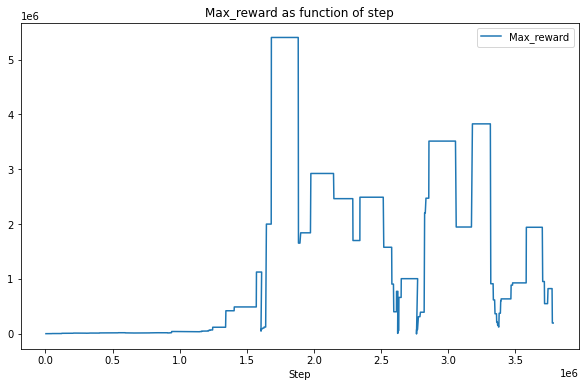

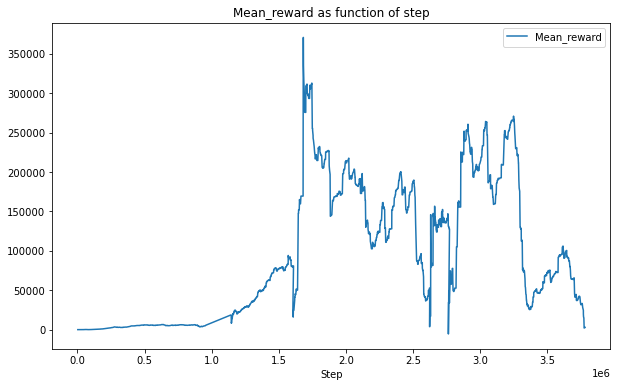

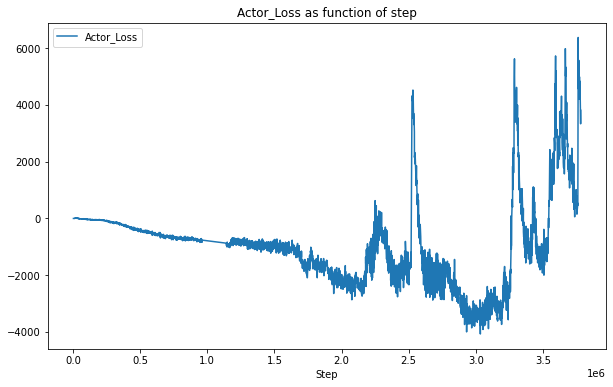

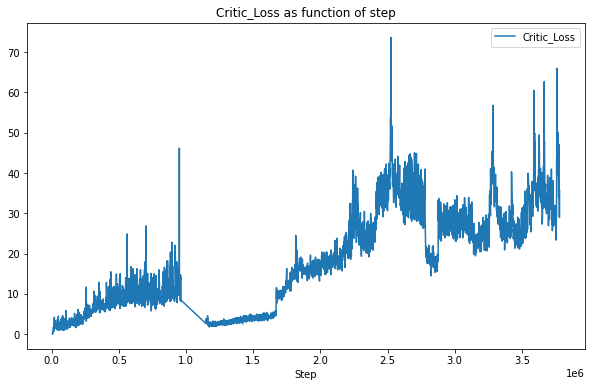

<Figure size 720x432 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
plt.rcParams["figure.figsize"] = (10,6)
import numpy as np
def plot_reward(df):
    ax = plt.gca()
    df.plot(kind='line',x='Step',y='Value',ax=ax)
    import numpy as np

    y_p = np.diff(df['Value']) / np.diff(df['Step'])
    x_p = (np.array(df['Step'])[:-1] + np.array(df['Step'])[1:]) / 2

    plt.figure()
    plt.plot(x_p,y_p, 'r',label='Derivative')
    plt.legend()
    plt.show()   
def plot_all_reward(dfs,dfs_name):
    for idx,df in enumerate(dfs):
        ax = plt.gca()
        df.plot(kind='line',x='Step',y='Value',ax=ax)
        ax.legend([dfs_name[idx]])
        plt.title('{d} as function of step'.format(d=dfs_name[idx]))
        plt.savefig(path+path[-5:-1]+'_'+str(dfs_name[idx])+'.png')
        plt.figure()
        
        
dfs = [df_max,df_mean,df_loss1,df_loss2]
dfs_name=['Max_reward','Mean_reward','Actor_Loss','Critic_Loss']
path = r'C:\Users\flori\OneDrive\Documents\Logitech\rl_ac\rl_ac\results\exp1/'
plot_all_reward(dfs,dfs_name)
